In [103]:
!pip install -q tensorflow scikit-learn pandas matplotlib seaborn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
print("TensorFlow version:", tf.__version__)

df = pd.read_csv('preprocessed_stress_level_dataset.csv')
df.head()

TensorFlow version: 2.19.0


,0,1,2,3,4,5,6,7,8,9,10,11,stress_level
0,0.148856,-0.536854,-0.035662,-0.022654,0.005551,0.005156,0.140960,0.006384,0.045010,-0.090917,-0.093667,0.117152,1
1,-1.234252,0.050406,0.175986,-0.012119,-0.039023,0.066206,-0.289890,0.005005,-0.088539,0.162851,0.045393,-0.014175,2
2,0.182803,-0.539474,-0.195669,-0.062566,-0.001541,-0.122357,0.082489,0.164423,0.146593,-0.050205,-0.011979,0.062376,1
3,-1.011052,0.112635,0.104176,-0.017509,0.165083,-0.084268,-0.108312,-0.048129,-0.107739,0.063114,-0.012221,-0.013529,2
4,0.018227,0.495427,-0.023228,-0.468229,0.755811,-0.148659,-0.004214,-0.198861,-0.403085,-0.263779,0.310921,0.286686,1


**Feature Scaling**

In [104]:
# Separate X and y
X = df.drop(columns=['stress_level'])
y = df['stress_level']

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape, "X_test shape:", X_test_scaled.shape)

X_train shape: (880, 12) X_test shape: (220, 12)


**Build a simple Keras MLP model (variety 1)**

In [105]:
# Train a basic MLP model with one hidden layer, reduced neurons, and less epochs

# Use the build_mlp function defined in the previous cell
# Assuming input_dim and n_classes are already defined from data preprocessing
input_dim = X_train_scaled.shape[1]
n_classes = len(np.unique(y_train))

model_reduced = build_mlp(input_dim=input_dim,
                          n_classes=n_classes,
                          hidden_layers=[16], # One hidden layer with 16 neurons
                          dropout_rate=0.2,      # Using default dropout
                          lr=1e-3)

# Train the model with fewer epochs
history_reduced = model_reduced.fit(
    X_train_scaled, y_train,
    validation_split=0.15,
    epochs=20, # Reduced epochs
    batch_size=32,
    verbose=2 # Show progress per epoch
)

model_reduced.summary()

Epoch 1/20
24/24 - 2s - 67ms/step - accuracy: 0.3048 - loss: 1.2827 - val_accuracy: 0.3409 - val_loss: 1.1795
Epoch 2/20
24/24 - 0s - 19ms/step - accuracy: 0.3877 - loss: 1.1811 - val_accuracy: 0.4621 - val_loss: 1.0735
Epoch 3/20
24/24 - 0s - 14ms/step - accuracy: 0.4920 - loss: 1.0601 - val_accuracy: 0.6061 - val_loss: 0.9801
Epoch 4/20
24/24 - 1s - 26ms/step - accuracy: 0.5909 - loss: 0.9653 - val_accuracy: 0.7652 - val_loss: 0.8990
Epoch 5/20
24/24 - 0s - 16ms/step - accuracy: 0.6751 - loss: 0.9017 - val_accuracy: 0.8030 - val_loss: 0.8242
Epoch 6/20
24/24 - 0s - 17ms/step - accuracy: 0.7754 - loss: 0.8036 - val_accuracy: 0.8258 - val_loss: 0.7542
Epoch 7/20
24/24 - 0s - 11ms/step - accuracy: 0.7928 - loss: 0.7482 - val_accuracy: 0.8712 - val_loss: 0.6900
Epoch 8/20
24/24 - 1s - 22ms/step - accuracy: 0.8222 - loss: 0.6893 - val_accuracy: 0.8864 - val_loss: 0.6314
Epoch 9/20
24/24 - 0s - 12ms/step - accuracy: 0.8543 - loss: 0.6218 - val_accuracy: 0.8864 - val_loss: 0.5779
Epoch 10/2

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.05 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 520 (2.04 KB)

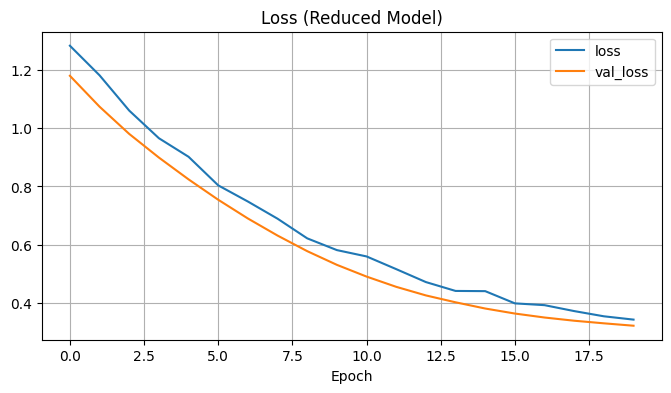

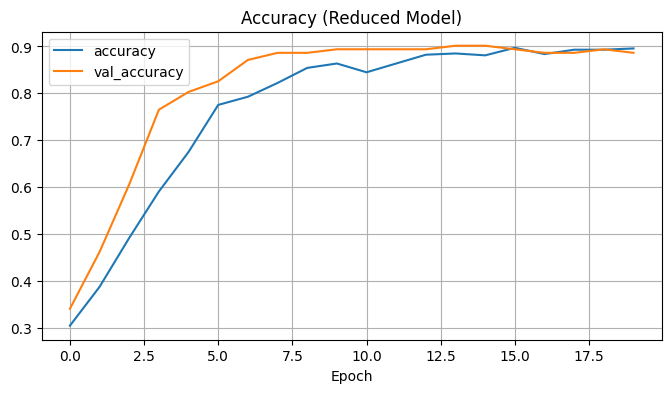

In [106]:
# Plot training history
history_reduced_df = pd.DataFrame(history_reduced.history)
history_reduced_df[['loss','val_loss']].plot(title='Loss (Reduced Model)', figsize=(8,4))
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

history_reduced_df[['accuracy','val_accuracy']].plot(title='Accuracy (Reduced Model)', figsize=(8,4))
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test accuracy (Reduced Model): 0.8590909090909091

Classification Report (Reduced Model):
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        74
           1       0.87      0.93      0.90        72
           2       0.88      0.85      0.86        74

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



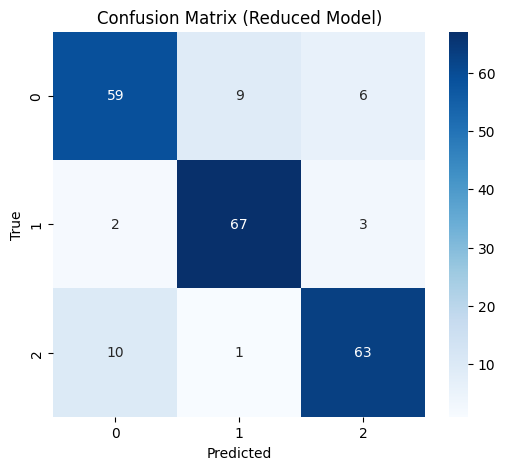

In [107]:
# Evaluate the reduced model on the test set
# Predictions
if n_classes == 2:
    y_proba = model_reduced.predict(X_test_scaled).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
else:
    y_proba = model_reduced.predict(X_test_scaled)
    y_pred = np.argmax(y_proba, axis=1)

print("Test accuracy (Reduced Model):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Reduced Model):\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Reduced Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Train the model variety 2 (with callbacks)**

In [108]:
# Cell 6: Training
input_dim = X_train_scaled.shape[1]
n_classes = len(np.unique(y_train))

model = build_mlp(input_dim=input_dim,
                  n_classes=n_classes,
                  hidden_layers=[128,64],
                  dropout_rate=0.25, lr=1e-3)

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

model_reduced.summary()

Epoch 1/100
24/24 - 2s - 96ms/step - accuracy: 0.5922 - loss: 0.9752 - val_accuracy: 0.8712 - val_loss: 0.7477 - learning_rate: 1.0000e-03
Epoch 2/100
24/24 - 0s - 15ms/step - accuracy: 0.8783 - loss: 0.6210 - val_accuracy: 0.8864 - val_loss: 0.4462 - learning_rate: 1.0000e-03
Epoch 3/100
24/24 - 0s - 16ms/step - accuracy: 0.8957 - loss: 0.3946 - val_accuracy: 0.8636 - val_loss: 0.3358 - learning_rate: 1.0000e-03
Epoch 4/100
24/24 - 0s - 18ms/step - accuracy: 0.8837 - loss: 0.3156 - val_accuracy: 0.8561 - val_loss: 0.2981 - learning_rate: 1.0000e-03
Epoch 5/100
24/24 - 0s - 20ms/step - accuracy: 0.8944 - loss: 0.2536 - val_accuracy: 0.8712 - val_loss: 0.2769 - learning_rate: 1.0000e-03
Epoch 6/100
24/24 - 1s - 21ms/step - accuracy: 0.9078 - loss: 0.2392 - val_accuracy: 0.8636 - val_loss: 0.2766 - learning_rate: 1.0000e-03
Epoch 7/100
24/24 - 0s - 13ms/step - accuracy: 0.9037 - loss: 0.2354 - val_accuracy: 0.8712 - val_loss: 0.2600 - learning_rate: 1.0000e-03
Epoch 8/100
24/24 - 0s - 12

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.05 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 520 (2.04 KB)

**Plot accuracy & loss graphs**

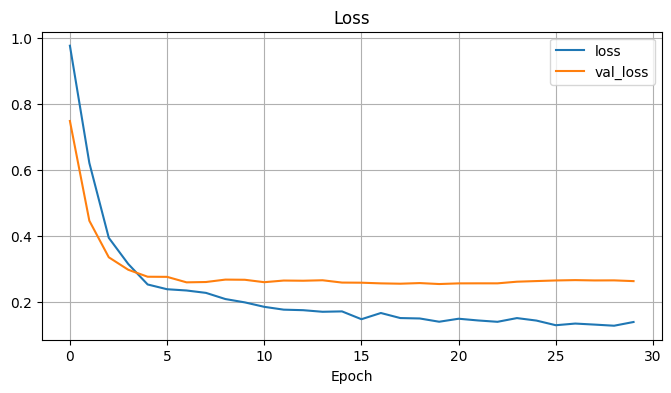

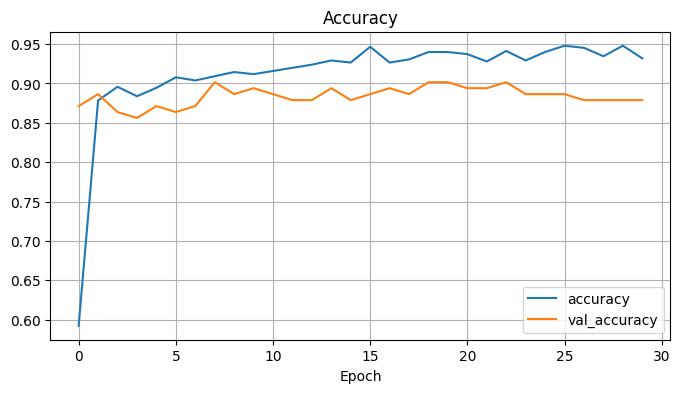

In [109]:
# Cell 7: Plot training history
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='Loss', figsize=(8,4))
plt.xlabel('Epoch')
plt.grid(True)
plt.show()

history_df[['accuracy','val_accuracy']].plot(title='Accuracy', figsize=(8,4))
plt.xlabel('Epoch')
plt.grid(True)
plt.show()


**Evaluate on test set and show confusion matrix / classification report**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test accuracy: 0.9090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89        74
           1       0.96      0.94      0.95        72
           2       0.89      0.89      0.89        74

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220



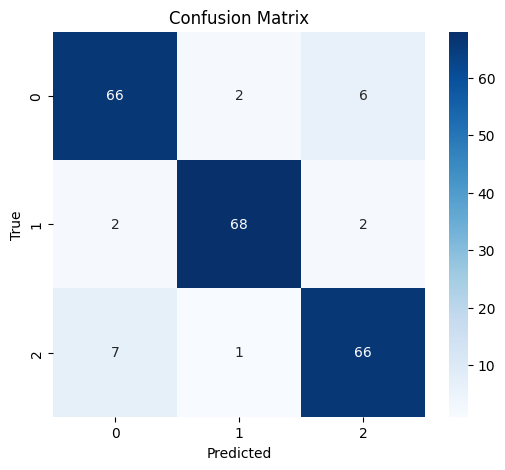

In [110]:
# Cell 8: Evaluation
# Predictions
if n_classes == 2:
    y_proba = model.predict(X_test_scaled).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
else:
    y_proba = model.predict(X_test_scaled)
    y_pred = np.argmax(y_proba, axis=1)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**quick hyperparameter search variety 3 (manual loop)**

In [111]:
#Manual grid over a few hyperparameters (fast)
results = []
histories = {} # Dictionary to store training histories
best_acc = 0 # Variable to store the best accuracy found
best_model = None # Variable to store the best model

hidden_options = [[64,32],[128,64],[256,128]]
dropouts = [0.0, 0.2]
for hidden in hidden_options:
    for dp in dropouts:
        key = f"Hidden: {hidden}, Dropout: {dp}"
        print(f"Training: {key}")
        m = build_mlp(input_dim=input_dim, n_classes=n_classes, hidden_layers=hidden, dropout_rate=dp, lr=1e-3)
        h = m.fit(X_train_scaled, y_train, validation_split=0.12, epochs=40, batch_size=32, verbose=0,
                  callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
        histories[key] = h.history # Store the history dictionary

        # evaluate quickly on test
        if n_classes == 2:
            yp = (m.predict(X_test_scaled).ravel() >= 0.5).astype(int)
        else:
            yp = np.argmax(m.predict(X_test_scaled), axis=1)
        acc = accuracy_score(y_test, yp)
        print("Acc:", acc)
        results.append({"hidden": hidden, "dropout": dp, "acc": acc})

        # Check if this model is the best so far
        if acc > best_acc:
            best_acc = acc
            best_model = m # Store the best model

display(pd.DataFrame(results).sort_values('acc', ascending=False))
model_reduced.summary()

Training: Hidden: [64, 32], Dropout: 0.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acc: 0.8818181818181818
Training: Hidden: [64, 32], Dropout: 0.2
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acc: 0.8818181818181818
Training: Hidden: [128, 64], Dropout: 0.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acc: 0.9045454545454545
Training: Hidden: [128, 64], Dropout: 0.2
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acc: 0.8954545454545455
Training: Hidden: [256, 128], Dropout: 0.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acc: 0.8772727272727273
Training: Hidden: [256, 128], Dropout: 0.2
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acc: 0.8909090909090909


,hidden,dropout,acc
2,"[128, 64]",0.0,0.904545
3,"[128, 64]",0.2,0.895455
5,"[256, 128]",0.2,0.890909
0,"[64, 32]",0.0,0.881818
1,"[64, 32]",0.2,0.881818
4,"[256, 128]",0.0,0.877273


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.05 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 520 (2.04 KB)

**Plot accuracy & loss graphs**

Plotting history for: Hidden: [64, 32], Dropout: 0.0


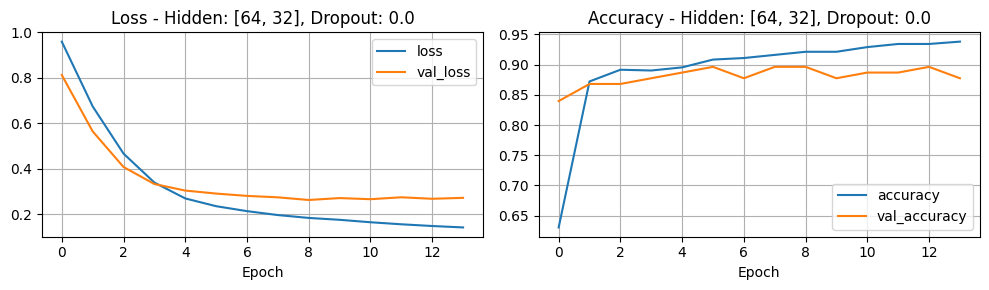

Plotting history for: Hidden: [64, 32], Dropout: 0.2


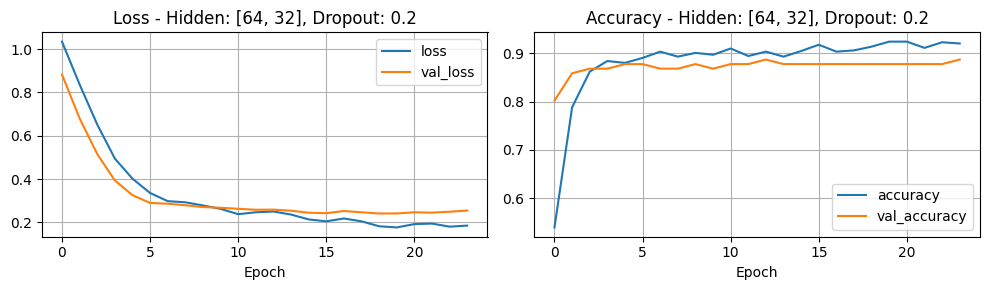

Plotting history for: Hidden: [128, 64], Dropout: 0.0


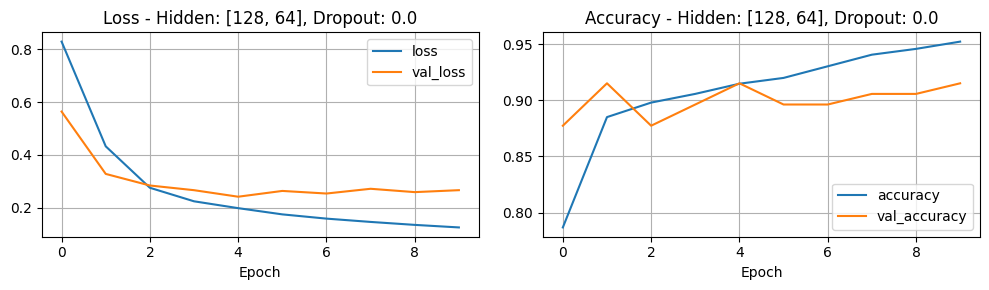

Plotting history for: Hidden: [128, 64], Dropout: 0.2


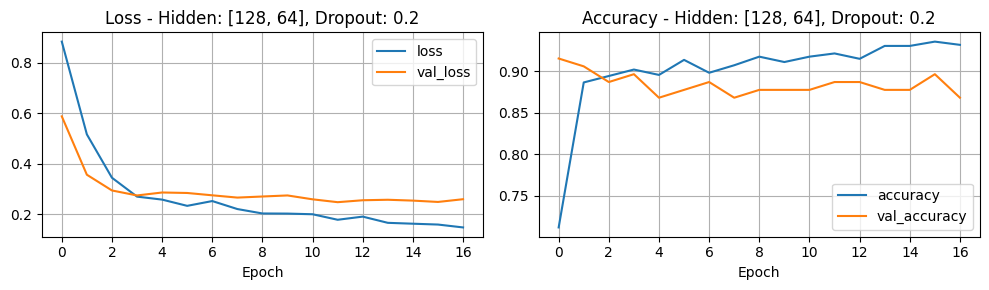

Plotting history for: Hidden: [256, 128], Dropout: 0.0


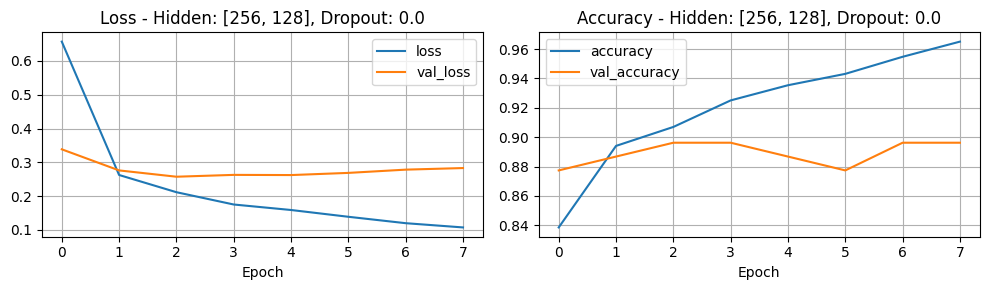

Plotting history for: Hidden: [256, 128], Dropout: 0.2


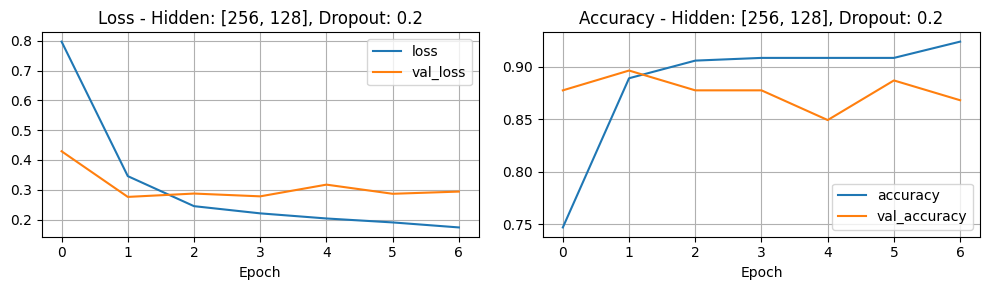

In [112]:
# Plot accuracy and loss graphs for each hyperparameter combination from stored histories side-by-side
if 'histories' not in locals() or not histories:
    print("Error: Training histories not found. Please run the hyperparameter tuning cell first.")
else:
    for key, history_data in histories.items():
        history_df = pd.DataFrame(history_data)

        print(f"Plotting history for: {key}")

        fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # Create a figure with 2 subplots in one row

        # Plot Loss on the first subplot
        history_df[['loss', 'val_loss']].plot(ax=axes[0])
        axes[0].set_title(f"Loss - {key}")
        axes[0].set_xlabel('Epoch')
        axes[0].grid(True)

        # Plot Accuracy on the second subplot
        history_df[['accuracy', 'val_accuracy']].plot(ax=axes[1])
        axes[1].set_title(f"Accuracy - {key}")
        axes[1].set_xlabel('Epoch')
        axes[1].grid(True)

        plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
        plt.show()

**Evaluate on test set and show confusion matrix / classification report**

Evaluating the best hyperparameter tuned model on the test set...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test accuracy (Best Tuned Model): 0.9045454545454545

Classification Report (Best Tuned Model):
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.94      0.94      0.94        72
           2       0.88      0.91      0.89        74

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



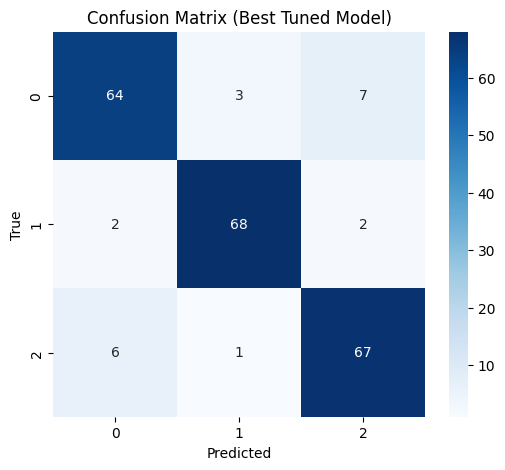

In [113]:
# Evaluate the best model on the test set and show confusion matrix / classification report

# Assuming 'best_model' variable is available from the hyperparameter tuning step
if 'best_model' not in locals():
    print("Error: 'best_model' not found. Please run the hyperparameter tuning cell first.")
else:
    print("Evaluating the best hyperparameter tuned model on the test set...")

    if n_classes == 2:
        y_proba_best_eval = best_model.predict(X_test_scaled).ravel()
        y_pred_best_eval = (y_proba_best_eval >= 0.5).astype(int)
    else:
        y_proba_best_eval = best_model.predict(X_test_scaled)
        y_pred_best_eval = np.argmax(y_proba_best_eval, axis=1)

    print("Test accuracy (Best Tuned Model):", accuracy_score(y_test, y_pred_best_eval))
    print("\nClassification Report (Best Tuned Model):\n", classification_report(y_test, y_pred_best_eval))

    # Confusion matrix for the best model
    cm_best_eval = confusion_matrix(y_test, y_pred_best_eval)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_best_eval, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Best Tuned Model)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [115]:
# Compare the base model, reduced model, and the best hyperparameter tuned model

print("\n--- variety 1 Performance ---")
# Evaluate the reduced model
if 'model_reduced' not in locals():
     print("Error: 'best_model' not found. Please run the hyperparameter tuning cell first.")
else:
    if n_classes == 2:
        y_proba_reduced_compare_zh = model_reduced.predict(X_test_scaled).ravel()
        y_pred_reduced_compare_zh = (y_proba_reduced_compare_zh >= 0.5).astype(int)
    else:
        y_proba_reduced_compare_zh = model_reduced.predict(X_test_scaled)
        y_pred_reduced_compare_zh = np.argmax(y_proba_reduced_compare_zh, axis=1)

    acc_reduced_zh = accuracy_score(y_test, y_pred_reduced_compare_zh)
    report_reduced_zh = classification_report(y_test, y_pred_reduced_compare_zh)

    print(f"Test Accuracy (variety 1): {acc_reduced_zh:.4f}")
    print("\nClassification Report (variety 1):\n", report_reduced_zh)


print("--- variety 2 ---")
# Re-evaluate the base model to ensure comparison is based on the same test set split
# Assuming 'model' variable holds the base model from the initial training with callbacks
if 'model' not in locals():
    print("Error: 'best_model' not found. Please run the hyperparameter tuning cell first.")
else:
    if n_classes == 2:
        y_proba_base_compare_zh = model.predict(X_test_scaled).ravel()
        y_pred_base_compare_zh = (y_proba_base_compare_zh >= 0.5).astype(int)
    else:
        y_proba_base_compare_zh = model.predict(X_test_scaled)
        y_pred_base_compare_zh = np.argmax(y_proba_base_compare_zh, axis=1)

    acc_base_zh = accuracy_score(y_test, y_pred_base_compare_zh)
    report_base_zh = classification_report(y_test, y_pred_base_compare_zh)

    print(f"Test Accuracy (variety 2 - with Callbacks): {acc_base_zh:.4f}")
    print("\nClassification Report (variety 2 - with Callbacks):\n", report_base_zh)


print("\n--- variety 3 ---")
# Re-evaluate the best tuned model to ensure comparison is based on the same test set split
# Assuming 'best_model' variable holds the best tuned model
if 'best_model' not in locals():
     print("Error: 'best_model' not found. Please run the hyperparameter tuning cell first.")
else:
    if n_classes == 2:
        y_proba_best_compare_zh = best_model.predict(X_test_scaled).ravel()
        y_pred_best_compare_zh = (y_proba_best_compare_zh >= 0.5).astype(int)
    else:
        y_proba_best_compare_zh = best_model.predict(X_test_scaled)
        y_pred_best_compare_zh = np.argmax(y_proba_best_compare_zh, axis=1)

    acc_best_zh = accuracy_score(y_test, y_pred_best_compare_zh)
    report_best_zh = classification_report(y_test, y_pred_best_compare_zh)

    print(f"Test Accuracy (variety 3): {acc_best_zh:.4f}")
    print("\nClassification Report (variety 3):\n", report_best_zh)

# Quick comparison summary
print("\n--- Summary Comparison ---")
# Check if variables exist before printing summary
if 'acc_reduced_zh' in locals():
    print(f"variety 1: {acc_reduced_zh:.4f}")
if 'acc_base_zh' in locals():
    print(f"variety 2: {acc_base_zh:.4f}")
if 'acc_best_zh' in locals():
    print(f"variety 3: {acc_best_zh:.4f}")

# Add comparison logic based on which models were evaluated
accuracies = {}
if 'acc_base_zh' in locals():
    accuracies['Base Model'] = acc_base_zh
if 'acc_reduced_zh' in locals():
    accuracies['Reduced Model'] = acc_reduced_zh
if 'acc_best_zh' in locals():
    accuracies['Best Tuned Model'] = acc_best_zh

if accuracies:
    best_model_name = max(accuracies, key=accuracies.get)
    print(f"\nBased on test accuracy, the '{best_model_name}' performed best.")
else:
    print("\nNo models were evaluated for comparison.")


--- variety 1 Performance ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy (variety 1): 0.8591

Classification Report (variety 1):
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        74
           1       0.87      0.93      0.90        72
           2       0.88      0.85      0.86        74

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220

--- variety 2 ---
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy (variety 2 - with Callbacks): 0.9091

Classification Report (variety 2 - with Callbacks):
               precision    recall  f1-score   support

           0       0.88      0.89      0.89        74
           1       0.96      0.94      0.95        72
           2       0.89      0.89      0.89        74

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91   